In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df=df.sample(frac=1).reset_index(drop=True)

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,66945,Female,49.0,0,0,Yes,Private,Urban,85.33,25.5,never smoked,0
1,48455,Female,37.0,0,0,Yes,Private,Urban,60.05,24.1,Unknown,0
2,60896,Male,68.0,0,1,Yes,Private,Rural,145.25,31.5,never smoked,0
3,30790,Female,75.0,1,0,Yes,Govt_job,Urban,88.83,41.7,never smoked,0
4,26893,Male,8.0,0,0,No,children,Urban,101.26,33.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,55592,Male,71.0,0,0,Yes,Private,Rural,109.73,28.9,never smoked,0
5106,42091,Male,32.0,0,0,Yes,Govt_job,Rural,83.01,25.8,smokes,0
5107,64155,Male,60.0,0,0,Yes,Govt_job,Rural,200.25,33.1,never smoked,0
5108,22678,Female,42.0,0,0,Yes,Govt_job,Urban,97.78,29.8,Unknown,0


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df=df[~ (df.smoking_status=="Unknown")]

In [6]:
df.drop("id",axis=1,inplace=True)
df

C:\Users\berka\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,49.0,0,0,Yes,Private,Urban,85.33,25.5,never smoked,0
2,Male,68.0,0,1,Yes,Private,Rural,145.25,31.5,never smoked,0
3,Female,75.0,1,0,Yes,Govt_job,Urban,88.83,41.7,never smoked,0
5,Male,36.0,0,0,No,Private,Rural,233.52,40.9,never smoked,0
6,Female,43.0,0,0,Yes,Private,Rural,102.50,50.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5103,Male,37.0,0,0,Yes,Private,Urban,79.56,25.2,never smoked,0
5105,Male,71.0,0,0,Yes,Private,Rural,109.73,28.9,never smoked,0
5106,Male,32.0,0,0,Yes,Govt_job,Rural,83.01,25.8,smokes,0
5107,Male,60.0,0,0,Yes,Govt_job,Rural,200.25,33.1,never smoked,0


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
gender=LabelEncoder().fit_transform(df.gender)
ever_married=LabelEncoder().fit_transform(df.ever_married)

In [8]:
df.gender=gender
df.ever_married=ever_married

C:\Users\berka\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df=pd.get_dummies(df,columns=["work_type","Residence_type","smoking_status"])

In [10]:
from ycimpute.imputer import knnimput
feat_names=list(df)
ndf=np.array(df)
s1=knnimput.KNN(k = 5).complete(ndf)
s1=s1.round()
df=pd.DataFrame(s1,columns=feat_names)
df.isnull().sum()

Imputing row 1/3566 with 0 missing, elapsed time: 1.925
Imputing row 101/3566 with 0 missing, elapsed time: 1.926
Imputing row 201/3566 with 0 missing, elapsed time: 1.927
Imputing row 301/3566 with 0 missing, elapsed time: 1.927
Imputing row 401/3566 with 0 missing, elapsed time: 1.928
Imputing row 501/3566 with 0 missing, elapsed time: 1.928
Imputing row 601/3566 with 0 missing, elapsed time: 1.929
Imputing row 701/3566 with 0 missing, elapsed time: 1.931
Imputing row 801/3566 with 0 missing, elapsed time: 1.932
Imputing row 901/3566 with 0 missing, elapsed time: 1.933
Imputing row 1001/3566 with 0 missing, elapsed time: 1.934
Imputing row 1101/3566 with 0 missing, elapsed time: 1.935
Imputing row 1201/3566 with 0 missing, elapsed time: 1.935
Imputing row 1301/3566 with 0 missing, elapsed time: 1.936
Imputing row 1401/3566 with 0 missing, elapsed time: 1.937
Imputing row 1501/3566 with 0 missing, elapsed time: 1.938
Imputing row 1601/3566 with 0 missing, elapsed time: 1.938
Imputing 

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [11]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
lof.fit_predict(df)
scores=lof.negative_outlier_factor_
scores

array([-1.01679505, -0.98726472, -1.26557059, ..., -0.99958474,
       -0.9776269 , -1.02420944])

In [12]:
scores.mean(),scores.max(),scores.min()

(-1.046475808237668, -0.9562749272367729, -2.989492578111825)

In [13]:
vector= scores >= -1.5
df=df[vector]

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,49.0,0.0,0.0,1.0,85.0,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,68.0,0.0,1.0,1.0,145.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,75.0,1.0,0.0,1.0,89.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,36.0,0.0,0.0,0.0,234.0,41.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,43.0,0.0,0.0,1.0,102.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,1.0,37.0,0.0,0.0,1.0,80.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3562,1.0,71.0,0.0,0.0,1.0,110.0,29.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3563,1.0,32.0,0.0,0.0,1.0,83.0,26.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3564,1.0,60.0,0.0,0.0,1.0,200.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [15]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
iqr=q3-q1
down_limit=(q1-iqr*1.5)
up_limit=(q3+iqr*1.5)
down_limit,up_limit

(11.5, 47.5)

In [16]:
vector= df.bmi <= 47.5
df=df[vector]

In [17]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [18]:
y

0       0.0
1       0.0
2       0.0
3       0.0
5       0.0
       ... 
3561    0.0
3562    0.0
3563    0.0
3564    0.0
3565    0.0
Name: stroke, Length: 3463, dtype: float64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier,
       CatBoostClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        if model==CatBoostClassifier:
            modelf=model().fit(x_train,y_train,verbose=False)
        else:
            modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(model(),x_train,y_train ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(model(),x_train,y_train ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train,x_test,y_train,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.9487364620938626
            f1_score:0.0
            fit&predict time:0.05484962463378906
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.9425992779783392
            f1_score:0.0708204334365325
            fit&predict time:0.1466076374053955
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.9487364620938626
            f1_score:0.0
            fit&predict time:0.19447994232177734
            
------------------------------------------------------------

            Model:MLPClassifier
            accuracy_score:0.9483754512635377
            f1_score:0.025098039215686273
            fit&predict time:1.0512056350708008
            
------------------------------------------------------------

            Model:DecisionTreeClassifier
            accura

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



            Model:XGBClassifier
            accuracy_score:0.9379061371841153
            f1_score:0.07186996010525422
            fit&predict time:0.19248390197753906
            
------------------------------------------------------------

            Model:CatBoostClassifier
            accuracy_score:0.9451263537906136
            f1_score:0.0
            fit&predict time:3.457806348800659
            
------------------------------------------------------------


In [20]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,
                         max_bin=255,
                         min_child_samples=10,
                         n_estimators=124,
                         num_leaves=40).fit(x_train,y_train)
y_pred=lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)
from sklearn.metrics import f1_score,classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       637
         1.0       0.00      0.00      0.00        56

    accuracy                           0.92       693
   macro avg       0.46      0.50      0.48       693
weighted avg       0.84      0.92      0.88       693



C:\Users\berka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\berka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\berka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[637,  56],
       [  0,   0]], dtype=int64)

In [21]:
# Our model can not predict even one stroke state since we have imbalanced data

In [22]:
!pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)

In [24]:
x_train_os

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.000000,37.000000,0.000000,0.0,1.000000,61.000000,36.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.0
1,0.000000,67.000000,0.000000,1.0,1.000000,94.000000,30.000000,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.0
2,0.000000,35.000000,0.000000,0.0,1.000000,124.000000,29.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.0
3,1.000000,31.000000,1.000000,0.0,1.000000,150.000000,45.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0
4,0.000000,25.000000,0.000000,0.0,0.000000,109.000000,41.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,1.000000,80.111023,0.000000,0.0,0.703674,91.407348,29.814697,0.0,0.0,0.000000,1.000000,0.0,0.703674,0.296326,0.000000,1.000000,0.0
5252,0.856531,81.143469,0.143469,0.0,1.000000,187.578164,27.995714,0.0,0.0,0.856531,0.143469,0.0,0.000000,1.000000,0.856531,0.143469,0.0
5253,0.000000,74.000000,0.848554,0.0,1.000000,70.757228,22.757228,0.0,0.0,0.848554,0.151446,0.0,0.000000,1.000000,0.000000,1.000000,0.0
5254,0.000000,41.596629,0.000000,0.0,1.000000,87.760486,27.731086,0.0,0.0,1.000000,0.000000,0.0,0.432771,0.567229,0.432771,0.567229,0.0


In [25]:
models=[LogisticRegression,
       KNeighborsClassifier,
       SVC,
       MLPClassifier,
       DecisionTreeClassifier,
       RandomForestClassifier,
       GradientBoostingClassifier,
       LGBMClassifier,
       XGBClassifier,
       CatBoostClassifier]

import time

def fitter(x_train,x_test,y_train,y_test,model):
        startt=time.time()
        modelf=model().fit(x_train,y_train)
        y_pred=modelf.predict(x_test)
        timer=time.time()-startt
        ascore=cross_val_score(model(),x_train_os,y_train_os ,cv=10, scoring="accuracy", n_jobs=-1).mean()
        f1score=cross_val_score(model(),x_train_os,y_train_os ,cv=10, scoring="f1", n_jobs=-1).mean()
        print("""
            Model:{}
            accuracy_score:{}
            f1_score:{}
            fit&predict time:{}
            """.format(model.__name__,ascore,f1score,timer))
        print("-"*60)


for i in models:
    fitter(x_train_os,x_test,y_train_os,y_test,i)

C:\Users\berka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



            Model:LogisticRegression
            accuracy_score:0.7798656527249683
            f1_score:0.7911487012033562
            fit&predict time:0.0578460693359375
            
------------------------------------------------------------

            Model:KNeighborsClassifier
            accuracy_score:0.8879442332065904
            f1_score:0.8971913338513386
            fit&predict time:0.09775137901306152
            
------------------------------------------------------------

            Model:SVC
            accuracy_score:0.7600771319934818
            f1_score:0.7685008323682475
            fit&predict time:1.0123157501220703
            
------------------------------------------------------------

            Model:MLPClassifier
            accuracy_score:0.8380800289697629
            f1_score:0.8473769683528343
            fit&predict time:3.648317813873291
            
------------------------------------------------------------

            Model:DecisionTreeCla

C:\Users\berka\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



            Model:XGBClassifier
            accuracy_score:0.9623472750316855
            f1_score:0.9528240024469458
            fit&predict time:0.35205864906311035
            
------------------------------------------------------------
Learning rate set to 0.020924
0:	learn: 0.6652703	total: 5.83ms	remaining: 5.82s
1:	learn: 0.6448020	total: 9.84ms	remaining: 4.91s
2:	learn: 0.6196775	total: 13.6ms	remaining: 4.53s
3:	learn: 0.5992130	total: 17.5ms	remaining: 4.37s
4:	learn: 0.5785961	total: 21.7ms	remaining: 4.31s
5:	learn: 0.5589098	total: 25.8ms	remaining: 4.27s
6:	learn: 0.5364320	total: 30.9ms	remaining: 4.39s
7:	learn: 0.5164777	total: 34.8ms	remaining: 4.32s
8:	learn: 0.5018539	total: 39.7ms	remaining: 4.37s
9:	learn: 0.4871789	total: 43.7ms	remaining: 4.32s
10:	learn: 0.4687013	total: 48.6ms	remaining: 4.37s
11:	learn: 0.4529860	total: 52.3ms	remaining: 4.31s
12:	learn: 0.4383731	total: 56.9ms	remaining: 4.32s
13:	learn: 0.4253943	total: 61.3ms	remaining: 4.31s
14:	learn:

203:	learn: 0.1055020	total: 767ms	remaining: 2.99s
204:	learn: 0.1052512	total: 771ms	remaining: 2.99s
205:	learn: 0.1049648	total: 776ms	remaining: 2.99s
206:	learn: 0.1048036	total: 782ms	remaining: 2.99s
207:	learn: 0.1046084	total: 787ms	remaining: 3s
208:	learn: 0.1044291	total: 792ms	remaining: 3s
209:	learn: 0.1042703	total: 796ms	remaining: 3s
210:	learn: 0.1040636	total: 801ms	remaining: 3s
211:	learn: 0.1038959	total: 806ms	remaining: 2.99s
212:	learn: 0.1037208	total: 810ms	remaining: 2.99s
213:	learn: 0.1034256	total: 815ms	remaining: 2.99s
214:	learn: 0.1032906	total: 820ms	remaining: 3s
215:	learn: 0.1030545	total: 825ms	remaining: 2.99s
216:	learn: 0.1028583	total: 829ms	remaining: 2.99s
217:	learn: 0.1025246	total: 833ms	remaining: 2.99s
218:	learn: 0.1023942	total: 837ms	remaining: 2.98s
219:	learn: 0.1021357	total: 842ms	remaining: 2.98s
220:	learn: 0.1018942	total: 846ms	remaining: 2.98s
221:	learn: 0.1017785	total: 850ms	remaining: 2.98s
222:	learn: 0.1016151	total

389:	learn: 0.0768256	total: 1.46s	remaining: 2.29s
390:	learn: 0.0766456	total: 1.47s	remaining: 2.29s
391:	learn: 0.0765199	total: 1.47s	remaining: 2.28s
392:	learn: 0.0763422	total: 1.48s	remaining: 2.28s
393:	learn: 0.0762006	total: 1.48s	remaining: 2.27s
394:	learn: 0.0761082	total: 1.48s	remaining: 2.27s
395:	learn: 0.0760544	total: 1.49s	remaining: 2.27s
396:	learn: 0.0759131	total: 1.49s	remaining: 2.26s
397:	learn: 0.0757920	total: 1.49s	remaining: 2.26s
398:	learn: 0.0756896	total: 1.5s	remaining: 2.25s
399:	learn: 0.0755610	total: 1.5s	remaining: 2.25s
400:	learn: 0.0754915	total: 1.5s	remaining: 2.25s
401:	learn: 0.0754296	total: 1.51s	remaining: 2.24s
402:	learn: 0.0753727	total: 1.51s	remaining: 2.24s
403:	learn: 0.0753032	total: 1.51s	remaining: 2.23s
404:	learn: 0.0752275	total: 1.52s	remaining: 2.23s
405:	learn: 0.0751283	total: 1.52s	remaining: 2.23s
406:	learn: 0.0749859	total: 1.52s	remaining: 2.22s
407:	learn: 0.0748024	total: 1.53s	remaining: 2.22s
408:	learn: 0.0

569:	learn: 0.0617574	total: 2.17s	remaining: 1.64s
570:	learn: 0.0616640	total: 2.17s	remaining: 1.63s
571:	learn: 0.0615394	total: 2.18s	remaining: 1.63s
572:	learn: 0.0614941	total: 2.18s	remaining: 1.62s
573:	learn: 0.0614870	total: 2.18s	remaining: 1.62s
574:	learn: 0.0614569	total: 2.19s	remaining: 1.62s
575:	learn: 0.0614043	total: 2.19s	remaining: 1.61s
576:	learn: 0.0613357	total: 2.19s	remaining: 1.61s
577:	learn: 0.0611950	total: 2.2s	remaining: 1.6s
578:	learn: 0.0611119	total: 2.2s	remaining: 1.6s
579:	learn: 0.0610698	total: 2.2s	remaining: 1.6s
580:	learn: 0.0609973	total: 2.21s	remaining: 1.59s
581:	learn: 0.0609735	total: 2.21s	remaining: 1.59s
582:	learn: 0.0609476	total: 2.22s	remaining: 1.58s
583:	learn: 0.0608976	total: 2.22s	remaining: 1.58s
584:	learn: 0.0608205	total: 2.22s	remaining: 1.58s
585:	learn: 0.0607691	total: 2.23s	remaining: 1.57s
586:	learn: 0.0607236	total: 2.23s	remaining: 1.57s
587:	learn: 0.0606682	total: 2.23s	remaining: 1.56s
588:	learn: 0.0606

731:	learn: 0.0522141	total: 2.8s	remaining: 1.02s
732:	learn: 0.0521146	total: 2.81s	remaining: 1.02s
733:	learn: 0.0520426	total: 2.81s	remaining: 1.02s
734:	learn: 0.0519502	total: 2.82s	remaining: 1.01s
735:	learn: 0.0518989	total: 2.82s	remaining: 1.01s
736:	learn: 0.0518607	total: 2.82s	remaining: 1.01s
737:	learn: 0.0518091	total: 2.83s	remaining: 1s
738:	learn: 0.0517242	total: 2.83s	remaining: 1s
739:	learn: 0.0516630	total: 2.84s	remaining: 997ms
740:	learn: 0.0516170	total: 2.84s	remaining: 993ms
741:	learn: 0.0515807	total: 2.85s	remaining: 989ms
742:	learn: 0.0515483	total: 2.85s	remaining: 986ms
743:	learn: 0.0515098	total: 2.85s	remaining: 982ms
744:	learn: 0.0514808	total: 2.86s	remaining: 978ms
745:	learn: 0.0514319	total: 2.86s	remaining: 974ms
746:	learn: 0.0513663	total: 2.86s	remaining: 970ms
747:	learn: 0.0513252	total: 2.87s	remaining: 966ms
748:	learn: 0.0512466	total: 2.87s	remaining: 962ms
749:	learn: 0.0511928	total: 2.87s	remaining: 958ms
750:	learn: 0.05112

919:	learn: 0.0432153	total: 3.5s	remaining: 304ms
920:	learn: 0.0431869	total: 3.5s	remaining: 301ms
921:	learn: 0.0431558	total: 3.51s	remaining: 297ms
922:	learn: 0.0431125	total: 3.51s	remaining: 293ms
923:	learn: 0.0430364	total: 3.52s	remaining: 289ms
924:	learn: 0.0430117	total: 3.52s	remaining: 286ms
925:	learn: 0.0429906	total: 3.52s	remaining: 282ms
926:	learn: 0.0429367	total: 3.53s	remaining: 278ms
927:	learn: 0.0429084	total: 3.53s	remaining: 274ms
928:	learn: 0.0428496	total: 3.53s	remaining: 270ms
929:	learn: 0.0428159	total: 3.54s	remaining: 266ms
930:	learn: 0.0427841	total: 3.54s	remaining: 262ms
931:	learn: 0.0427251	total: 3.54s	remaining: 259ms
932:	learn: 0.0426806	total: 3.55s	remaining: 255ms
933:	learn: 0.0426717	total: 3.55s	remaining: 251ms
934:	learn: 0.0426462	total: 3.56s	remaining: 247ms
935:	learn: 0.0426062	total: 3.56s	remaining: 243ms
936:	learn: 0.0425567	total: 3.56s	remaining: 239ms
937:	learn: 0.0425042	total: 3.56s	remaining: 236ms
938:	learn: 0.

In [26]:
lgbm_tuned=LGBMClassifier(learning_rate=0.01,
                         max_bin=255,
                         min_child_samples=10,
                         n_estimators=124,
                         num_leaves=40).fit(x_train_os,y_train_os)
y_pred=lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.8845598845598845

In [27]:
from sklearn.metrics import f1_score,classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       637
         1.0       0.15      0.09      0.11        56

    accuracy                           0.88       693
   macro avg       0.53      0.52      0.52       693
weighted avg       0.86      0.88      0.87       693



array([[608,  51],
       [ 29,   5]], dtype=int64)

In [28]:
### a little bit better after oversampling

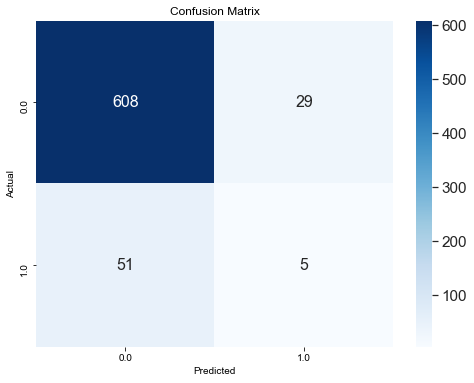

In [29]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_val_score(lgbm_tuned,x_train_os,y_train_os, scoring='roc_auc', cv=cv, n_jobs=-1).mean()

0.9885891920798625

In [31]:
cross_val_score(lgbm_tuned,x_train_os,y_train_os, scoring='f1', cv=cv, n_jobs=-1).mean()

0.9515012858766608

In [33]:
### Oversampling worked.